# Project 5: PISA Dataset Exploration 

In this notebook, the preprocessed PISA 2012 dataset is investigated in more detail. During the exploratory data analysis, the variables are studied in separate as well as in view of their interrelations with each other. Interesting findings are selected for the final presentation.
The general investigation primarily focuses on the influences of information and communication technology (ICT) on students' PISA test performance levels.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

First of all, the prepared PISA dataset is loaded into the Jupyter environment.

In [2]:
pisa_df = pd.read_csv("pisa_new.csv", encoding="utf-8")
pisa_df

,country,oecd,gender,age,at_home_computer,at_home_internet,at_school_computer,at_school_internet,first_use_computer,first_use_internet,at_school_chatting,at_school_emailing,at_school_browsing,at_school_downloading,at_school_posting,at_home_computer_study_time,at_home_study_time,at_school_computer_study_time,avg_math_score,avg_read_score,avg_science_score,avg_total_score
0,Australia,OECD,Female,15.75,"Yes, and I use it","Yes, and I use it","Yes, but I don’t use it","Yes, and I use it",6 years old or younger,7-9 years old,Never or hardly ever,Once or twice a month,Almost every day,Once or twice a month,Once or twice a month,2.0,8.0,32.0,562.63438,582.47156,581.81648,575.640807
1,Australia,OECD,Female,15.67,"Yes, but I don’t use it","Yes, and I use it","Yes, but I don’t use it","Yes, and I use it",7-9 years old,7-9 years old,Never or hardly ever,Once or twice a month,Almost every day,Once or twice a week,Once or twice a month,0.0,5.0,32.0,557.33758,575.64050,601.58522,578.187767
2,Australia,OECD,Female,16.08,No,"Yes, and I use it","Yes, but I don’t use it","Yes, and I use it",7-9 years old,13 years old or older,Never or hardly ever,Never or hardly ever,Every day,Never or hardly ever,Never or hardly ever,14.0,NaN,92.0,513.24974,584.45730,566.80344,554.836827
3,Australia,OECD,Male,15.92,"Yes, and I use it","Yes, and I use it","Yes, but I don’t use it","Yes, and I use it",6 years old or younger,7-9 years old,Never or hardly ever,Once or twice a week,Almost every day,Once or twice a week,Never or hardly ever,0.0,10.0,163.0,578.52470,609.54018,640.19024,609.418373
4,Australia,OECD,Male,16.17,"Yes, and I use it","Yes, and I use it",No,"Yes, and I use it",6 years old or younger,7-9 years old,Never or hardly ever,Never or hardly ever,Once or twice a week,Never or hardly ever,Once or twice a month,2.0,13.0,81.0,519.24754,553.32384,603.26370,558.611693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299838,Uruguay,Non-OECD,Female,15.83,No,"Yes, and I use it","Yes, and I use it","Yes, and I use it",7-9 years old,10-12 years old,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,0.0,5.0,51.0,346.01184,357.60234,336.57216,346.728780
299839,Uruguay,Non-OECD,Female,16.00,"Yes, and I use it","Yes, and I use it","Yes, but I don’t use it","Yes, but I don’t use it",6 years old or younger,6 years old or younger,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,NaN,NaN,26.0,469.31766,502.96112,446.79226,473.023680
299840,Uruguay,Non-OECD,Male,15.42,"Yes, but I don’t use it","Yes, and I use it","Yes, but I don’t use it","Yes, and I use it",6 years old or younger,10-12 years old,Never or hardly ever,Never or hardly ever,Once or twice a month,Once or twice a month,Never or hardly ever,0.0,1.0,92.0,511.38030,442.01388,478.96306,477.452413
299841,Uruguay,Non-OECD,Male,16.25,No,"Yes, and I use it",No,"Yes, and I use it",7-9 years old,10-12 years old,Every day,Every day,Once or twice a month,Every day,Every day,NaN,NaN,137.0,343.67504,384.43422,372.75270,366.953987


#### General structure and main features of interest

The readily prepared dataset consists of 299843 rows and 22 columns, thereby it is a subset of the original PISA 2012 data. The columns provide demographic information about a student's home country, gender, or age. Additionally, columns from the ICT questionnaire were selected, since they hold relevant information about the availability and usage of information and communication technology for each student. Those ICT-related variables are compared with other variables like average test scores or estimated study time.


### Univariate Exploration

In this section, distributions of individual variables are investigated. If there are unusual points or outliers, further analysis will be conducted to shed light on these abnormalities.

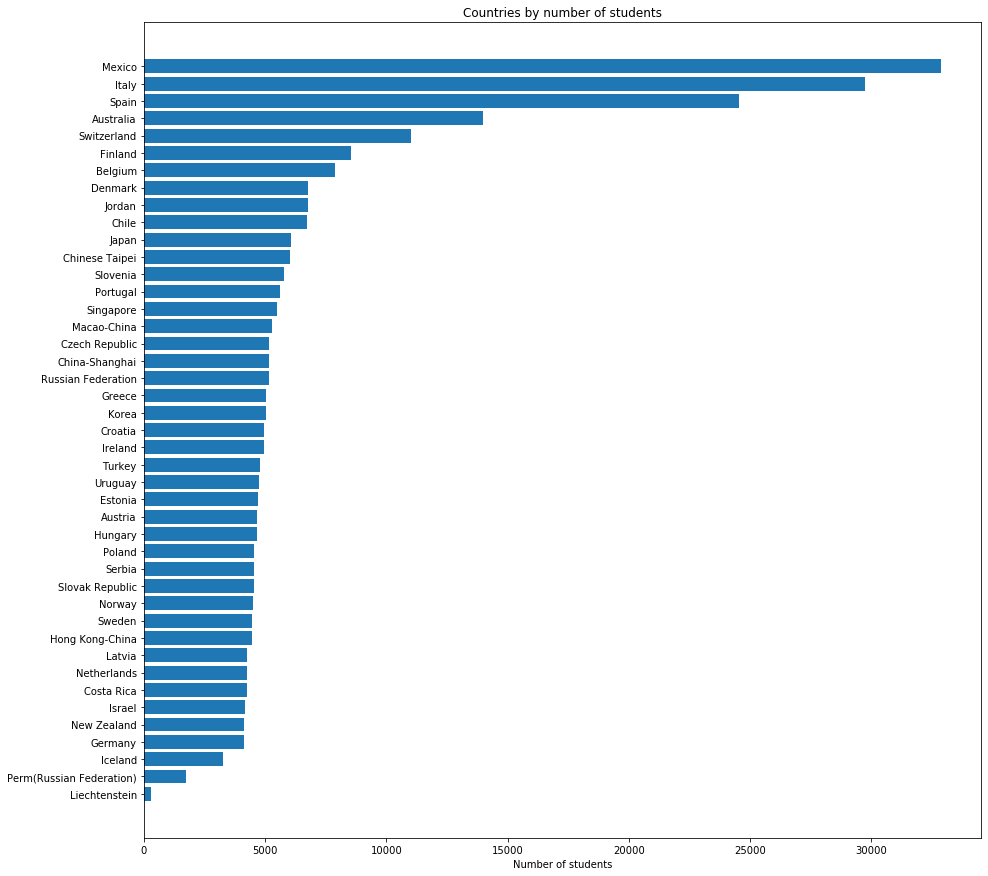

In [3]:
# Use bar chart to plot number of students per country
country_data = pisa_df.country.value_counts().reset_index()
fig, ax = plt.subplots(figsize = [15,15])
ax.barh(country_data["index"], country_data.country)
ax.set_yticklabels(country_data["index"])
ax.invert_yaxis()
ax.set_xlabel("Number of students")
ax.set_title("Countries by number of students");

By looking at the countries with the most participants, it becomes apparent that Mexico, Italy, and Spain account for roughly 90000 students. Then, Australia, Switzerland and Finland follow with a greater distance. As visible in the bar plot, the remaining countries tend to have a similar number of students with around 5000-7500 records. Consequently,  the data could be biased towards the top three countries.

C:\Users\schne\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\schne\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


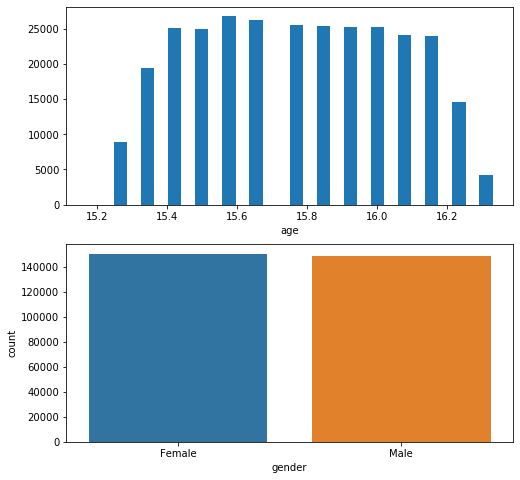

In [4]:
# Plot age histogram and gender bar chart
fig, ax = plt.subplots(2,1, figsize = [8,8])
ax[0].hist(data = pisa_df, x = "age", bins=30)
ax[0].set_xlabel("age")
sb.countplot(data = pisa_df, x = "gender", ax = ax[1])
ax[1].set_xlabel("gender")
plt.show()

Above, two plots about demographic variables are presented. The vast majority of students are between 15 and 16 years old. In the range between 15.4 and 16.1, the distribution resembles a uniform shape. Furthermore, the gender ratio seems to be balanced out well. There are nearly 15000 students for each biological gender.

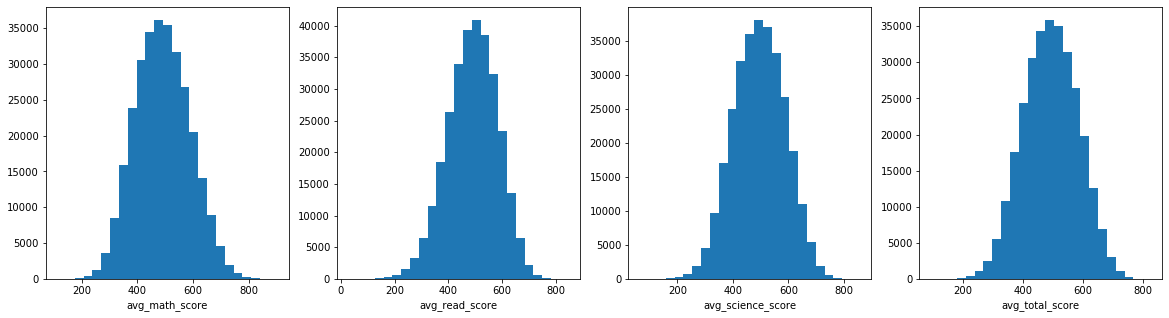

In [5]:
# Create histograms of all students' test scores
fig, ax = plt.subplots(1,4, figsize = [20,5])
variables = ["avg_math_score", "avg_read_score", "avg_science_score", "avg_total_score"]
for i in range(len(variables)):
    var = variables[i]
    ax[i].hist(data = pisa_df, x = var, bins = 25)
    ax[i].set_xlabel('{}'.format(var))
plt.show()

In the cell above, there are five histograms representing the distribution of average test scores for all students. Not only the total average score, but also the subject-specific scores for math, reading, and science are normally distributed. Almost every test result falls in the range between 200 and 800 points. There are no problematic outliers, too. 

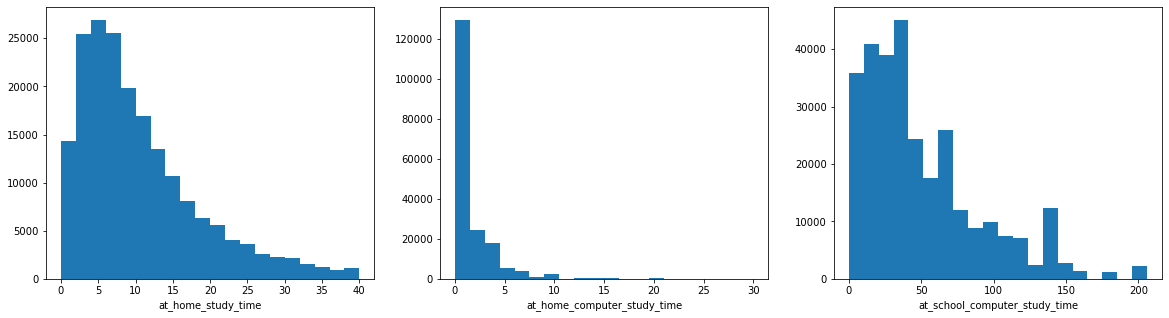

In [6]:
# Create additional histograms for study time variables
fig, ax = plt.subplots(1,3, figsize = [20,5])
variables = ["at_home_study_time", "at_home_computer_study_time", "at_school_computer_study_time"]
for i in range(len(variables)):
    var = variables[i]
    ax[i].hist(data = pisa_df, x = var, bins = 20)
    ax[i].set_xlabel('{}'.format(var))
plt.show()

In contrast to the bell-shaped test scores, the distributions of the students' study time is obviously not symmetric. In fact, the study time at home (hours) as well as the computer study time at home (hours) and at school (mins) are right-skewed. This is especially the extreme for the computer study time at home, since most students study 0-2 hours with their computers at home, but some study over 20 hours. Considering study time at home and computer study time at school, the most frequent stated durations were 5 hours per week in the former and 45 minutes per day in the latter case.

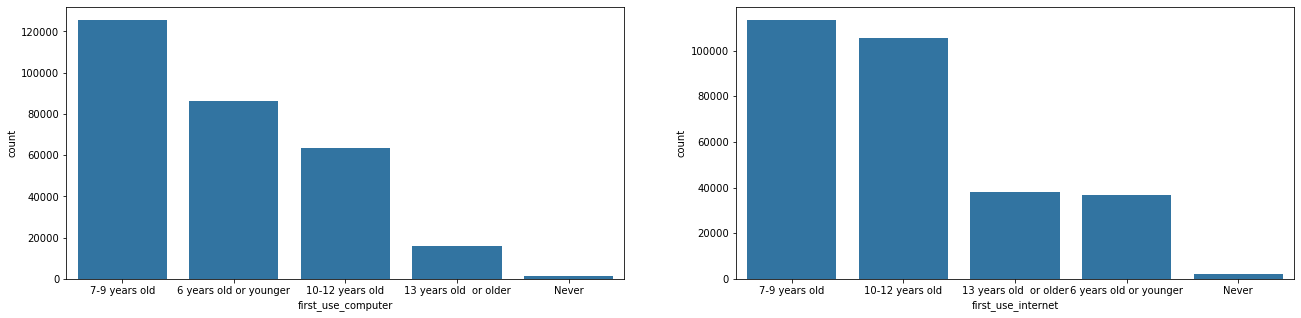

In [7]:
# Plot bar charts describing at which age ICT was first used
fig, ax = plt.subplots(1,2, figsize = [22,5])
variables = ["first_use_computer", "first_use_internet"]
for i in range(len(variables)):
    var = variables[i]
    sb.countplot(data = pisa_df, x = var, ax = ax[i], order = pisa_df[var].value_counts().index, color=sb.color_palette()[0])
    ax[i].set_xlabel('{}'.format(var))
plt.show()

Aside from computer study time, the age of first use regarding computers or the internet are other interesting variables to consider. The largest number of students started to use both computers and the internet at an age of 7-9, whereby the first use of computers usually happened earlier than the first connection with the internet. Only a small percentage of students have never used either technology.

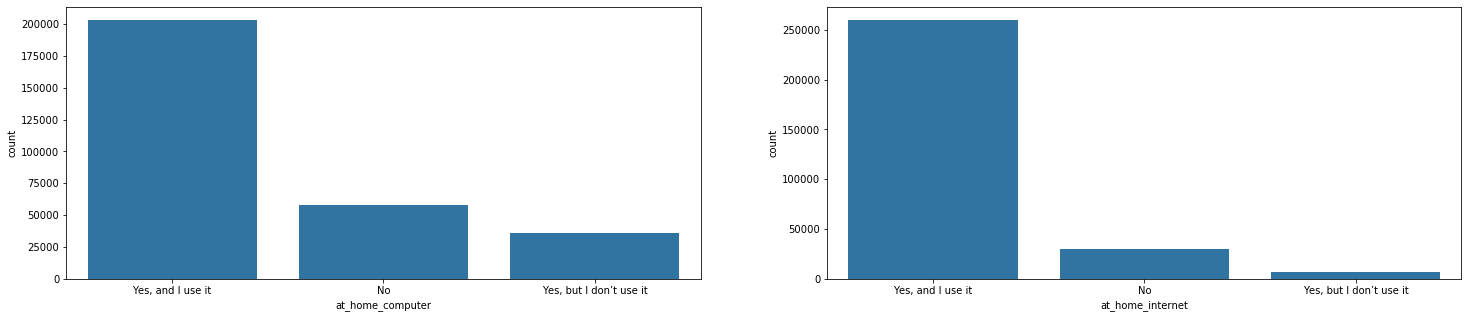

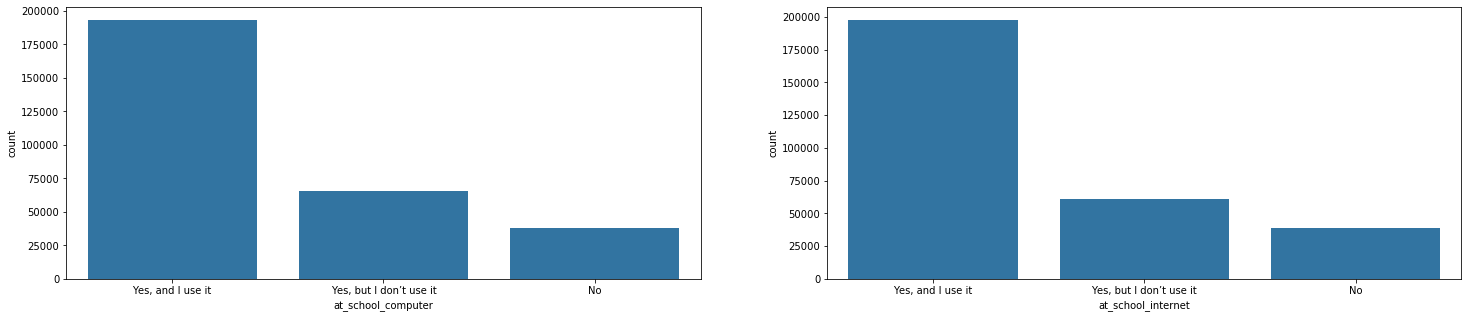

In [8]:
# Construct bar charts showing the availability and usage of ICT at home
fig, ax = plt.subplots(1,2, figsize = [25,5])
variables = ["at_home_computer", "at_home_internet"]
for i in range(len(variables)):
    var = variables[i]
    sb.countplot(data = pisa_df, x = var, ax = ax[i], order = pisa_df[var].value_counts().index, color=sb.color_palette()[0])
    ax[i].set_xlabel('{}'.format(var))
plt.show()

# Construct bar charts showing the availability and usage of ICT at school
fig, ax = plt.subplots(1,2, figsize = [25,5])
variables = ["at_school_computer", "at_school_internet"]
for i in range(len(variables)):
    var = variables[i]
    sb.countplot(data = pisa_df, x = var, ax = ax[i], order = pisa_df[var].value_counts().index, color=sb.color_palette()[0])
    ax[i].set_xlabel('{}'.format(var))
plt.show()

The four bar charts above give information about the availability and usage of ICT. What stands out is that a very large proportion of students have access to computers and internet. The availability of such ICT in schools is even slightly better than in students' homes. However, even if schools provide such technology, the actual usage rate at school is seemingly lower than at home.

## Bivariate Exploration

In this section, relationships between pairs of variables are explored. This is done by conventional correlation analyses with Pearson's correlation coefficient.

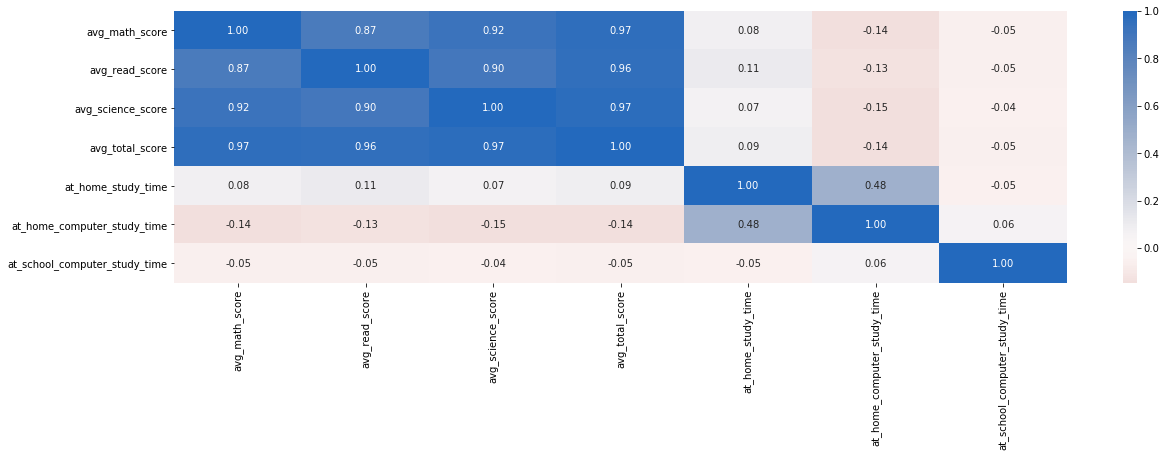

In [9]:
# Correlation matrix of numeric variables concerning test scores and study time
numeric_vars = ["avg_math_score", "avg_read_score", "avg_science_score", "avg_total_score", "at_home_study_time", "at_home_computer_study_time", "at_school_computer_study_time"]
plt.figure(figsize = [20, 5])
sb.heatmap(pisa_df[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

A correlation matrix is an effective instrument for bivariate analyses. In the exemplary matrix plotted above, the focus lies on numeric variables, such as test scores and reported learning time. The strongest positive correlations can be observed between the scores of the different test areas math, reading, or science. If a student does well in one subject, it is likely that he will do well in another as well. Interestingly enough, the study time out of school is only weakly correlated with test scores. The study at home on the computer is even negatively correlated with students' performance in the PISA test, though the correlation is rather weak. Still, this could imply a problem with ineffective studying.

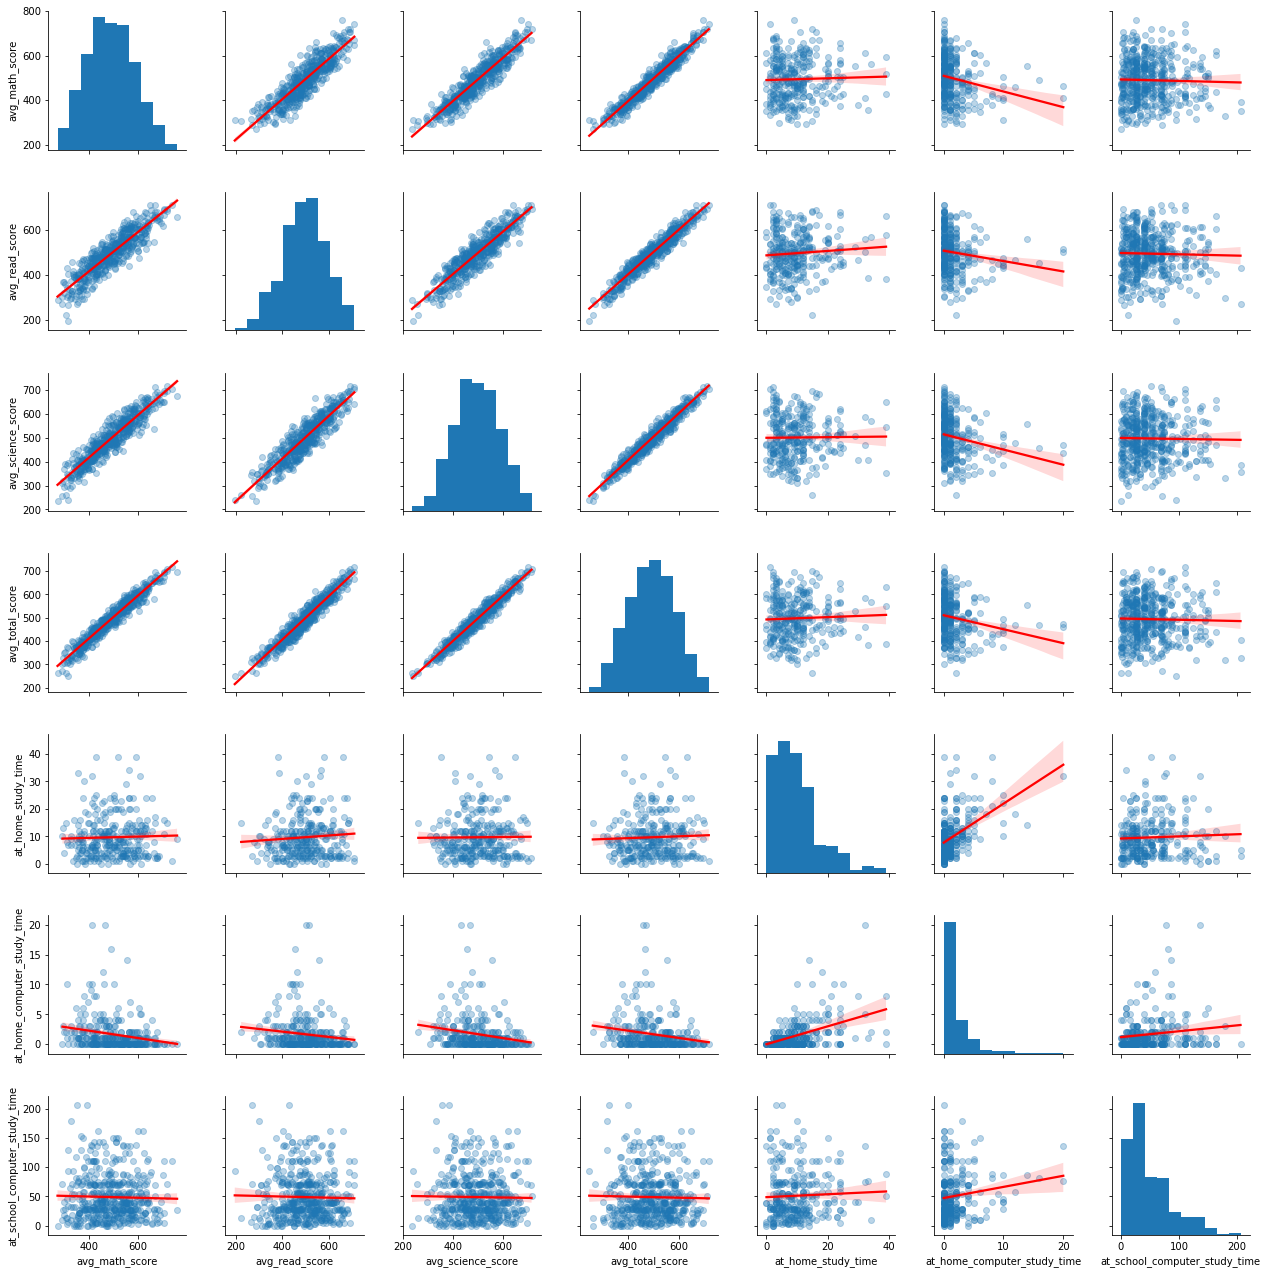

In [10]:
# Create scatter plot matrix for numeric variables shown above
pisa_df_sample = pisa_df.sample(500)
sb.pairplot(pisa_df_sample[numeric_vars], kind="reg", plot_kws={"line_kws":{"color":"red"}, # Include regression line
                                                                "scatter_kws": {"alpha": 0.3}});

Another way to visualize the correlation matrix from above is to create scatter plots instead of calculating correlation scores. The added regression lines allow for an easier interpretation. Like in the first correlation matrix, the last two columns indicate a negative relationship between study time on the computer and test scores. Nonetheless, the effect of studying with the computer at school is not as negative as doing the same at home. This could be a promising area for further investigation.

## Multivariate Exploration

In the following, plots for three or more variables are generated.

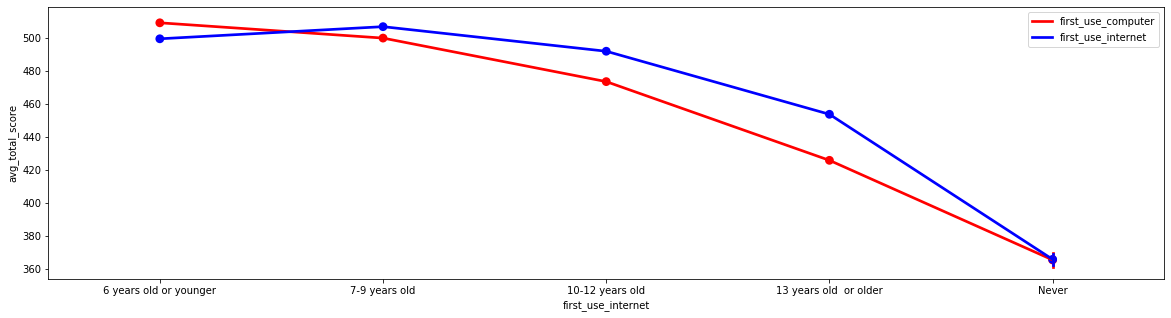

In [11]:
plt.figure(figsize=[20, 5])
sb.pointplot(data = pisa_df, 
              x = "first_use_computer",
              y = "avg_total_score",
             color = "red", order = ["6 years old or younger", "7-9 years old", "10-12 years old",
       "13 years old  or older", "Never"])
sb.pointplot(data = pisa_df, 
              x = "first_use_internet",
              y = "avg_total_score",
             color = "blue", order = ["6 years old or younger", "7-9 years old", "10-12 years old",
       "13 years old  or older", "Never"])
plt.legend(labels=["first_use_computer", "first_use_internet"])
ax = plt.gca()
ax.get_legend().legendHandles[0].set_color("red")
ax.get_legend().legendHandles[1].set_color("blue");

After the univariate exploration of the age of first ICT usage, the respective variables can be set into relation with average total test scores. For both computer and internet use, there is an obvious downward trend in test scores with an increasing age of first ICT use. Students who never used the technologies in question have by far the lowest average test scores.

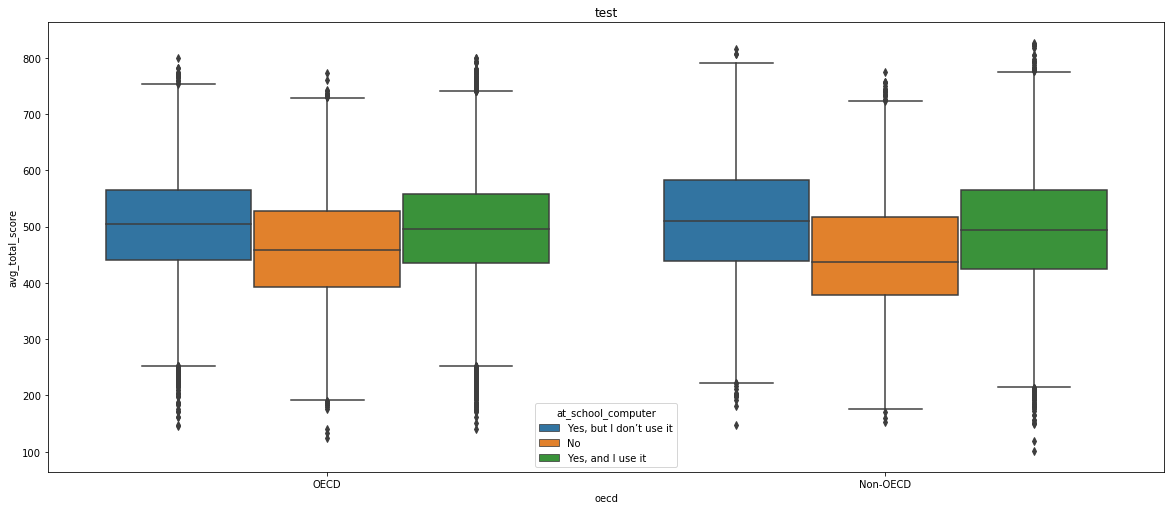

In [12]:
plt.figure(figsize=[20, 8.27])
sb.boxplot(data = pisa_df, 
             x = "oecd",
              y = "avg_total_score",
              hue = "at_school_computer")
plt.title("test");

Another multivariate analysis concerning the availability of computers at school is presented above. The sheer existence of computer equipment in schools is positively connected with higher test scores. This is the case for OECD and non-OECD countries alike. The actual usage of computers at school, however, has apparently not a significant effect on test scores.

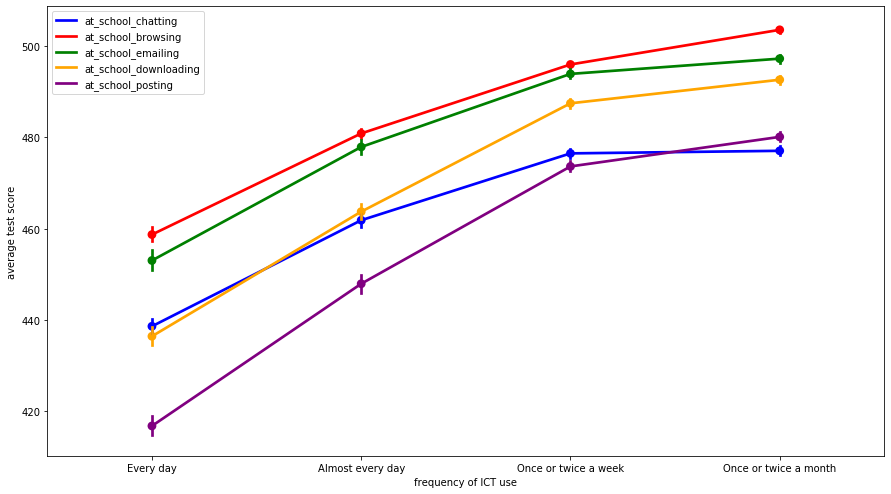

In [13]:
plt.figure(figsize=[15, 8.27])
# for color loop
variable_colors = [("at_school_chatting", "blue"), ("at_school_browsing", "red"), ("at_school_emailing", "green"), ("at_school_downloading", "orange"), ("at_school_posting", "purple")]
for v in variable_colors: 
    ax = sb.pointplot(data = pisa_df, x = v[0], y = "avg_total_score", order = ["Every day", "Almost every day", "Once or twice a week",
           "Once or twice a month"], color = v[1], linestyles = "-")
    
plt.legend(labels=["at_school_chatting", "at_school_browsing", "at_school_emailing", "at_school_downloading", "at_school_posting"])
ax = plt.gca()
for v in variable_colors:
    ax.get_legend().legendHandles[variable_colors.index(v)].set_color(v[1])

ax.set(xlabel = "frequency of ICT use", ylabel= "average test score")
plt.show();

Finally, the usage behavior of ICT in school is inspected. As it can be seen from the line chart above, average total PISA test scores improve with a decreasing frequency of ICT usage. This holds equally true for activities such as downloading, browsing, emailing, chatting and posting. The two latter activities are related with the lowest test scores. Also, the described effect becomes weaker with less frequent usage. The effect size between daily and almost daily usage is greater than between weekly or monthly usage.